In [1]:
#time series is a supervised machine learning
#here set of data points that are changes with the time,depended on time
#Level:the avg of the value based on the specified time 
#trend:uptrend and downtrend
#sesonality:the up's and down in the trend based on the condition and time(eg in sale based on wether and also days)
#cyclic pattern:an repeted fluctuation in pattern
#noise:from which not able infer anything

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
df_temperature = pd.read_csv("C:/Users/dheve/OneDrive/Desktop/course/GlobalTemperatures.csv")
df_temperature.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [17]:
df_temperature['SMA_10'] = df_temperature.LandAverageTemperature.rolling(10, min_periods=1).mean()
df_temperature['SMA_20'] = df_temperature.LandAverageTemperature.rolling(20, min_periods=1).mean()
#.rolling provide the window calculation it returns the object as result
#Purpose of Using Rolling:
# Smoothing the Data: Moving averages help in smoothing out short-term fluctuations, making long-term trends easier to spot.
# Noise Reduction: Time series data is often noisy. The rolling window helps reduce noise by averaging over adjacent data points.
# Trend Identification: Moving averages allow you to observe both short-term (SMA_10) and long-term (SMA_20) trends.
df_temperature['SMA_10'].shape

(1992,)

Text(0, 0.5, 'Temperature [°C]')

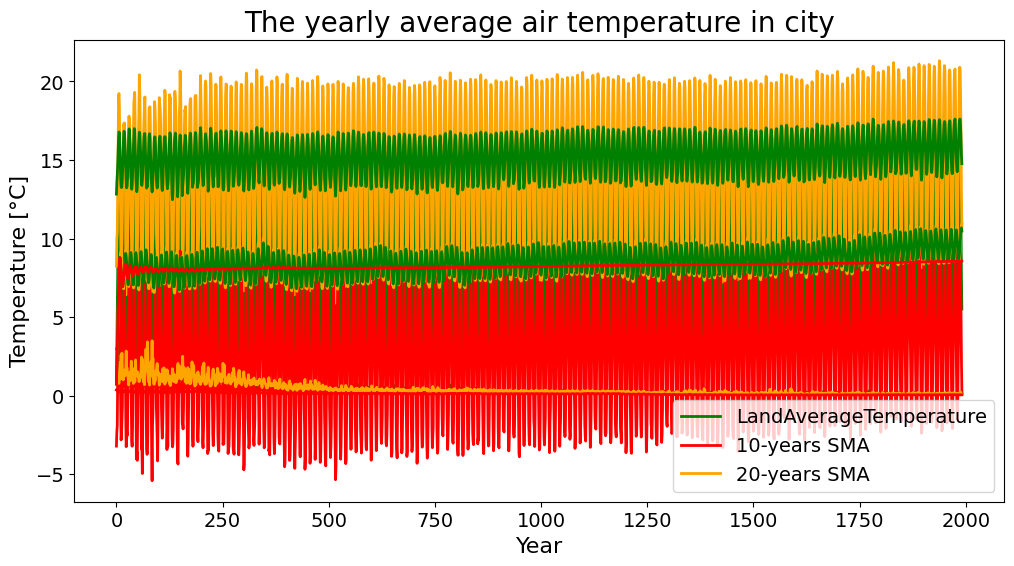

In [17]:
colors = ['green', 'red', 'orange']
# Line plot 
df_temperature.plot(color=colors, linewidth=2, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['LandAverageTemperature','10-years SMA','20-years SMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]',fontsize=16)



Text(0, 0.5, 'Temperature [°C]')

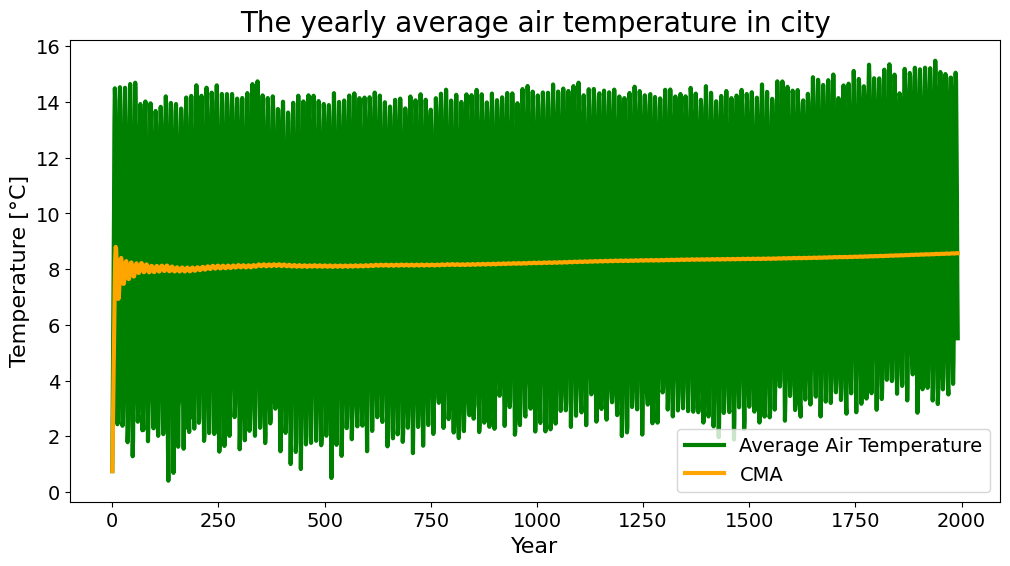

In [15]:
# CMA Air temperature
df_temperature['CMA'] = df_temperature.LandAverageTemperature.expanding().mean() #used to find cumalative avarage
#the expanding is same as simple moving avg but the avg is incresed based on no of point
# green -Avg Air Temp and Orange -CMA
colors = ['green', 'orange']
df_temperature[['LandAverageTemperature', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Air Temperature', 'CMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

